# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

In [1]:
#importing numpy and pandas library
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the train dataset
df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
#check the number of rows and columns 
print("Rows {} and Columns {}".format(df_train.shape[0],df_train.shape[1]))

Rows 31647 and Columns 18


In [4]:
#check the memory usage,datatypes, entries, non-null count
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
#statistical summary of numerical columns
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#checking the sum of null values in columns
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
#name of the column 
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
#for visualization importing seaborn and matplotlib library
import seaborn as sns
import matplotlib.pyplot as plt

no     27932
yes     3715
Name: subscribed, dtype: int64


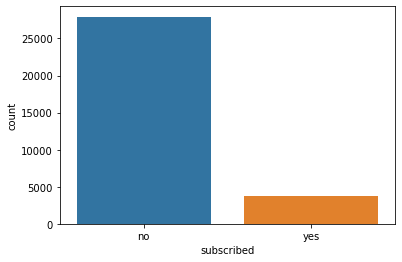

In [9]:
print(df_train["subscribed"].value_counts())
sns.countplot(df_train["subscribed"],data=df_train)
plt.show()

# Q. What is the current state of our term deposit subscribtion rates?

1. Current Subscription Rates:

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64


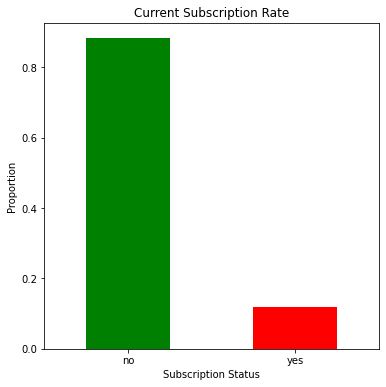

In [10]:
# Calculate the current subscription rate
subscription_rate = df_train['subscribed'].value_counts(normalize=True)
print(subscription_rate)
# Plot the current subscription rate
plt.figure(figsize=(6, 6))
subscription_rate.plot(kind='bar', color=['green', 'red'])
plt.title('Current Subscription Rate')
plt.xlabel('Subscription Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


11.7% subscribtion rate of term deposit and 88.2% have not subscribed for term deposit

2. Historical Trend of Subscription Rates:

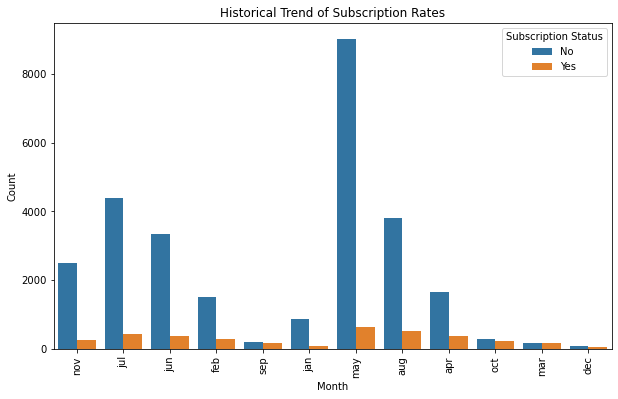

In [11]:
# Create a count plot to visualize the historical trend
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='month', hue='subscribed')
plt.title('Historical Trend of Subscription Rates')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


In May month, High no. of clients have not subscribed for Term Deposit

# What are the characteristics of clients who are more likely to subscribe to term deposits?

In [12]:
df_train['age'].unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

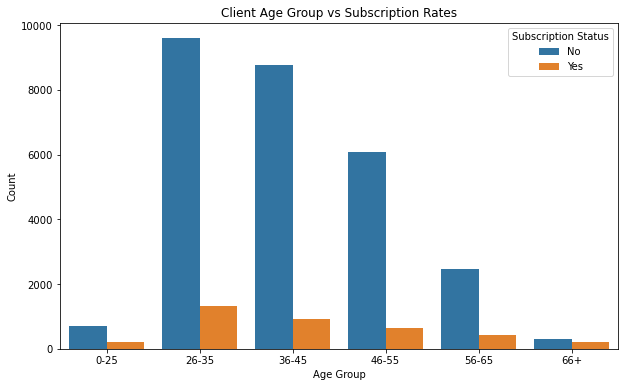

In [13]:
# Create age groups by dividing the 'age' column into bins
age_bins = [0, 25, 35, 45, 55, 65, 100]  # Define your age group bins
age_labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Labels for the age groups

df_train['age_group'] = pd.cut(df_train['age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='age_group', hue='subscribed')
plt.title('Client Age Group vs Subscription Rates')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


26-35 age group have maximum client that are no subscribtion for term deposit

In [14]:
df_train['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

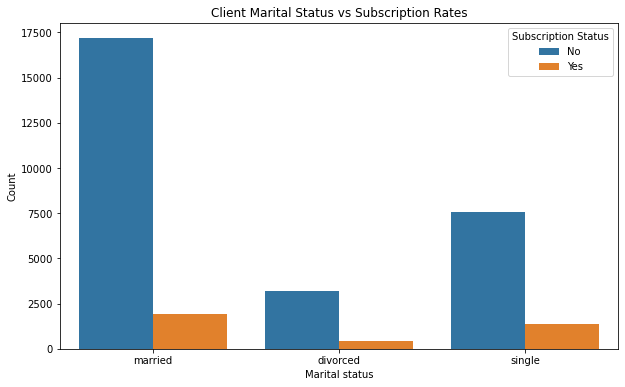

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='marital', hue='subscribed')
plt.title('Client Marital Status vs Subscription Rates')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


Married Clients are mostly who are not subscribed for term deposit

In [16]:
df_train['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

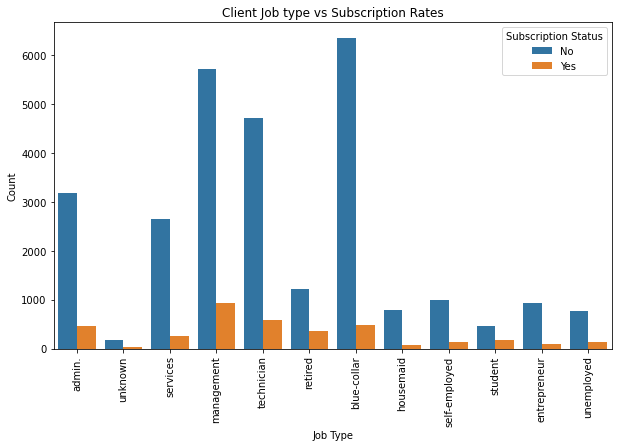

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='job', hue='subscribed')
plt.title('Client Job type vs Subscription Rates')
plt.xticks(rotation=90)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


Maximum Clients who are not subscribed whose jobs are blue-collar,management and technician

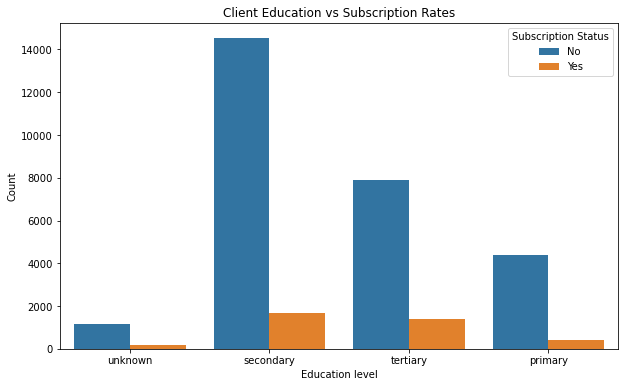

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='education', hue='subscribed')
plt.title('Client Education vs Subscription Rates')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


Secondary Education level clients are not subscribed for term deposit 

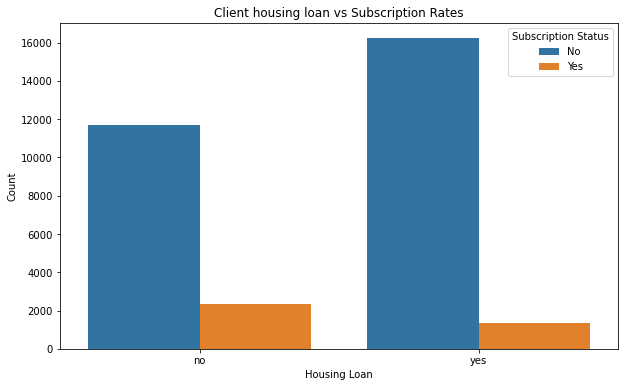

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='housing', hue='subscribed')
plt.title('Client housing loan vs Subscription Rates')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()


Mostly Client who have housing loan are not subscribed for Term deposit 

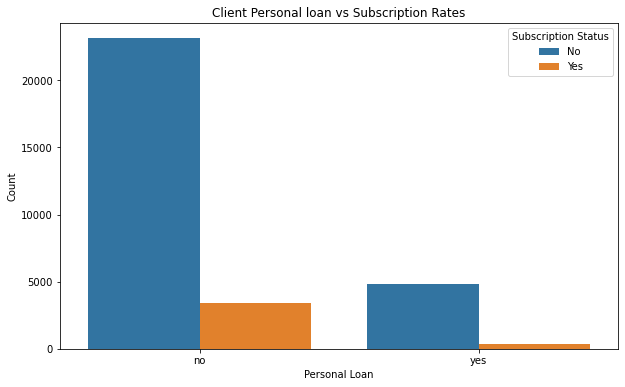

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='loan', hue='subscribed')
plt.title('Client Personal loan vs Subscription Rates')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()

Mostly Clients who have no personal loan who are not subscribed for Term Deposit

# Explore previous campaign 

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

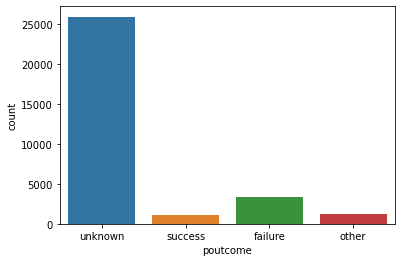

In [21]:
sns.countplot(df_train['poutcome'],data = df_train)
df_train['poutcome'].value_counts()

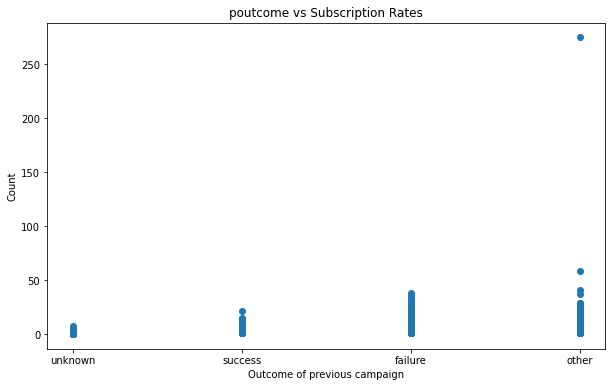

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter( y=df_train['previous'], x=df_train['poutcome'])
plt.title('poutcome vs Subscription Rates')
plt.xlabel('Outcome of previous campaign')
plt.ylabel('Count')
plt.show()


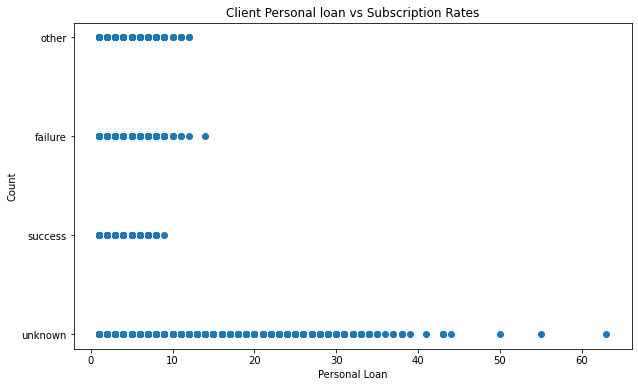

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter( x=df_train['campaign'], y=df_train['poutcome'])
plt.title('Client Personal loan vs Subscription Rates')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()


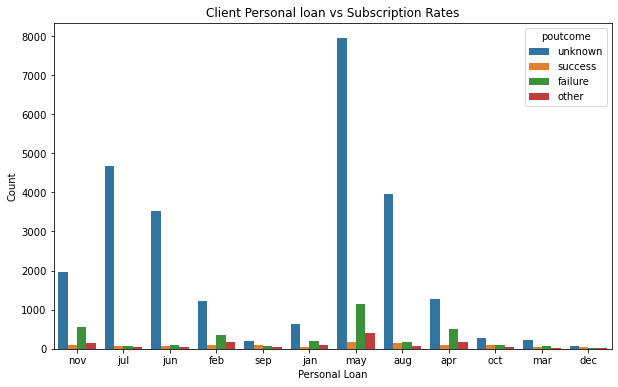

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='month', hue='poutcome')
plt.title('Client Personal loan vs Subscription Rates')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()


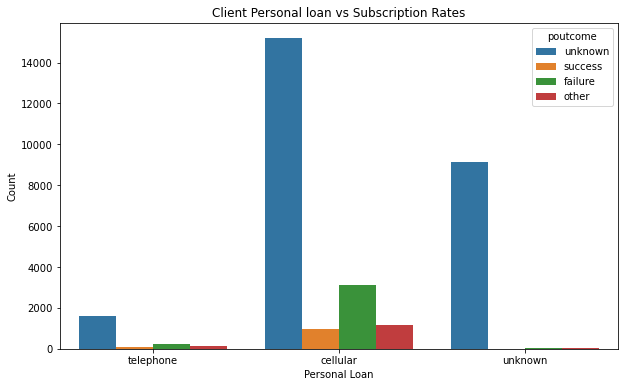

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='contact', hue='poutcome')
plt.title('Client Personal loan vs Subscription Rates')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

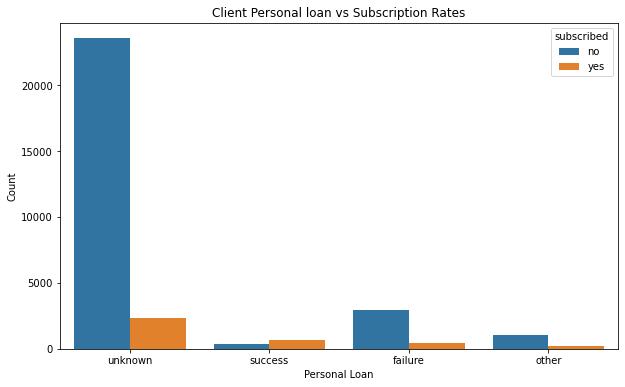

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='poutcome', hue='subscribed')
plt.title('Client Personal loan vs Subscription Rates')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

In [27]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,56-65
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,26-35
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,26-35
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,56-65
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,26-35


In [28]:
df_test= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [29]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [30]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])
    
df_train['subscribed']=le.fit_transform(df_train['subscribed'])

In [31]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0,56-65
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0,26-35
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0,26-35
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1,56-65
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0,26-35


In [32]:
x=df_train[['ID','age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome']]
y= df_train['subscribed']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xvalid, ytrain, yvalid =train_test_split(x,y,test_size=0.2,random_state =34)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,precision_score
def modelresults(predictions):
    print(f"Accuracy score of the model is {accuracy_score(yvalid,predictions)*100}")
    print(f"Confusion Matrix of the model is \n{confusion_matrix(yvalid,predictions)}")
    print(f"Precision score of the model is \n{precision_score(yvalid,predictions)*100}")
    print(f"Recall of the model is \n{recall_score(yvalid,predictions)*100}")
    print(f"F1 score of the model is \n{f1_score(yvalid,predictions)*100}")

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred =lr.predict(xvalid)
modelresults(ypred)

Accuracy score of the model is 88.68878357030016
Confusion Matrix of the model is 
[[5439  131]
 [ 585  175]]
Precision score of the model is 
57.18954248366013
Recall of the model is 
23.026315789473685
F1 score of the model is 
32.833020637898684


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)
ypred =knn.predict(xvalid)
modelresults(ypred)

Accuracy score of the model is 89.24170616113744
Confusion Matrix of the model is 
[[5364  206]
 [ 475  285]]
Precision score of the model is 
58.044806517311606
Recall of the model is 
37.5
F1 score of the model is 
45.563549160671464


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred =dtc.predict(xvalid)
modelresults(ypred)

Accuracy score of the model is 88.76777251184834
Confusion Matrix of the model is 
[[5223  347]
 [ 364  396]]
Precision score of the model is 
53.29744279946165
Recall of the model is 
52.10526315789473
F1 score of the model is 
52.694610778443106


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100) 
rfc.fit(xtrain,ytrain)
ypred =rfc.predict(xvalid)
modelresults(ypred)

Accuracy score of the model is 90.39494470774092
Confusion Matrix of the model is 
[[5377  193]
 [ 415  345]]
Precision score of the model is 
64.12639405204462
Recall of the model is 
45.39473684210527
F1 score of the model is 
53.15870570107859


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gbc.fit(xtrain, ytrain)  # Fit the model on the training data

ypred = gbc.predict(xvalid)  # Make predictions on the validation set
modelresults(ypred)  # Evaluate the model's performance on the validation set


Accuracy score of the model is 90.93206951026856
Confusion Matrix of the model is 
[[5372  198]
 [ 376  384]]
Precision score of the model is 
65.97938144329896
Recall of the model is 
50.526315789473685
F1 score of the model is 
57.22801788375558


In [47]:
test_prediction=gbc.predict(df_test)

In [48]:
sub=pd.DataFrame()

In [51]:
sub['ID']=df_test['ID']
sub['Subscribed']=test_prediction

In [52]:
sub['Subscribed'].replace(0,'No',inplace=True)

sub['Subscribed'].replace(1,'Yes',inplace=True)

In [53]:
sub.to_csv('subscription.csv',header=True,index=False)
#save the client subscribed a term deposit in csv file

In [54]:
sub

,ID,Subscribed
0,38441,No
1,40403,Yes
2,3709,No
3,37422,No
4,12527,No
...,...,...
13559,23465,No
13560,11743,No
13561,28292,No
13562,45163,Yes
